In [53]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [54]:
df= pd.read_csv("/content/sample_data/k_means.csv")
df.head()

,asd,zxc
0,2,1
1,3,1
2,4,1
3,5,1
4,6,3


Text(0, 0.5, 'zxc')

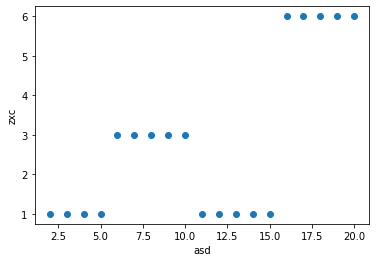

In [55]:
plt.scatter(df['asd'],df['zxc'])
plt.xlabel('asd')
plt.ylabel('zxc')

In [56]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['asd','zxc']])
y_predicted

array([3, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2],
      dtype=int32)

In [57]:
df['cluster']=y_predicted
df.head(20)

,asd,zxc,cluster
0,2,1,3
1,3,1,3
2,4,1,3
3,5,1,3
4,6,3,1
5,7,3,1
6,8,3,1
7,9,3,1
8,10,3,1
9,11,1,0


In [58]:
km.cluster_centers_

array([[13. ,  1. ],
       [ 8. ,  3. ],
       [18. ,  6. ],
       [ 3.5,  1. ]])

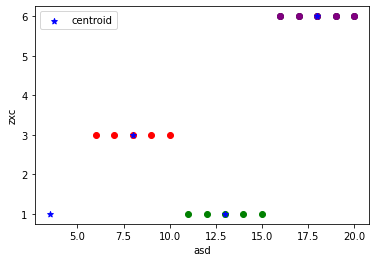

In [59]:

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.asd,df1['zxc'],color='green') 
plt.scatter(df2.asd,df2['zxc'],color='red')
plt.scatter(df3.asd,df3['zxc'],color='black')
plt.scatter(df3.asd,df3['zxc'],color='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='*',label='centroid')
plt.xlabel('asd')
plt.ylabel('zxc')
plt.legend()

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['zxc']])
df['zxc'] = scaler.transform(df[['zxc']])

scaler.fit(df[['asd']])
df['asd'] = scaler.transform(df[['asd']])

In [61]:
df.head()

,asd,zxc,cluster
0,0.000000,0.0,3
1,0.055556,0.0,3
2,0.111111,0.0,3
3,0.166667,0.0,3
4,0.222222,0.4,1


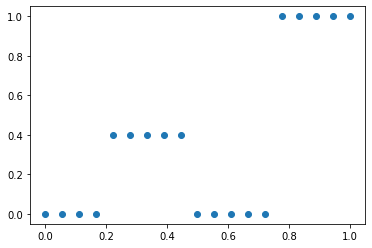

In [62]:
plt.scatter(df.asd,df['zxc'])

In [63]:

km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['asd','zxc']])
y_predicted

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1],
      dtype=int32)

In [64]:
df['cluster']=y_predicted
df.head()

,asd,zxc,cluster
0,0.000000,0.0,2
1,0.055556,0.0,2
2,0.111111,0.0,2
3,0.166667,0.0,2
4,0.222222,0.4,0


In [65]:
km.cluster_centers_

array([[0.33333333, 0.4       ],
       [0.88888889, 1.        ],
       [0.08333333, 0.        ],
       [0.61111111, 0.        ]])

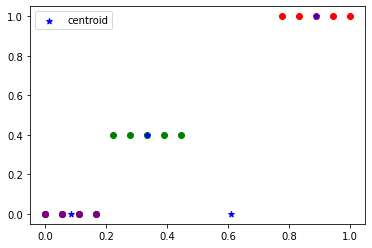

In [66]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.asd,df1['zxc'],color='green')
plt.scatter(df2.asd,df2['zxc'],color='red')
plt.scatter(df3.asd,df3['zxc'],color='black')
plt.scatter(df3.asd,df3['zxc'],color='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='*',label='centroid')
plt.legend()

In [67]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['asd','zxc']])
    sse.append(km.inertia_)

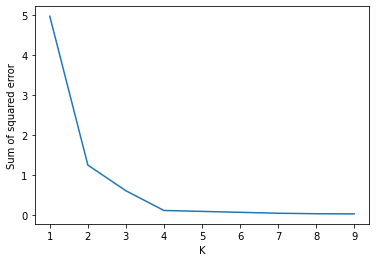

In [68]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)